In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#Data load

df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [23]:
#Check The Rows And Columns of the Datasets.

print(f"The Total Rows of the Datasets is {df.shape[0]} and the total Columns is {df.shape[1]}.\n")

The Total Rows of the Datasets is 4340 and the total Columns is 8.



In [24]:
#Show some data of the Datasets

print("Lets see some datasets valus..........\n")
df.head()

Lets see some datasets valus..........



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [25]:
#Cleaning Data
print("Lets Clean the datasets.......\n")

print("Lets see there is any Null Values are not......\n")

df.isnull().sum()

Lets Clean the datasets.......

Lets see there is any Null Values are not......



name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [26]:
#Lets use some encoding technique to encode the Labeled data from the datasets.

print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [27]:
#Lets use the Label Encoding for convert the transmission into the datasets.

lb = LabelEncoder()
temp = ['fuel','seller_type','transmission','owner']

for i in temp:
    df[i] = lb.fit_transform(df[i])

In [28]:
print("Lets see the Full Dataset After this encoding.......\n")
df.head(10)

Lets see the Full Dataset After this encoding.......



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2
5,Maruti Alto LX BSIII,2007,140000,125000,4,1,1,0
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,4,1,1,0
7,Tata Indigo Grand Petrol,2014,240000,60000,4,1,1,2
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,4,1,1,0
9,Maruti Celerio Green VXI,2017,365000,78000,0,1,1,0


In [29]:
#Lets Make two new columns of this Name of the cars that is "Brand", "Unique Model"

print("Lets Make two new columns of this Name of the cars that is 'Brand', 'Unique Model'..........\n")

df['brand'] = df["name"].str.split(' ').str[:2]
df['unique_model_number'] = df["name"].str.split(' ').str[2::]

df['brand'] = df['brand'].apply(lambda x : ' '.join(x))
df['unique_model_number'] = df['unique_model_number'].apply(lambda y: ' '.join(y))

print("Lets see the Updated data sheet after the making this new columns.........\n")
df.head()

Lets Make two new columns of this Name of the cars that is 'Brand', 'Unique Model'..........

Lets see the Updated data sheet after the making this new columns.........



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,unique_model_number
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,Maruti 800,AC
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,Maruti Wagon,R LXI Minor
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,Hyundai Verna,1.6 SX
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,Datsun RediGO,T Option
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,Honda Amaze,VX i-DTEC


In [30]:
print("Lets Drope the Unwanted Name Column from the datasheets and see the updated datasets.......\n")

df.drop('name',axis=1,inplace=True)

df.head()

Lets Drope the Unwanted Name Column from the datasheets and see the updated datasets.......



,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,unique_model_number
0,2007,60000,70000,4,1,1,0,Maruti 800,AC
1,2007,135000,50000,4,1,1,0,Maruti Wagon,R LXI Minor
2,2012,600000,100000,1,1,1,0,Hyundai Verna,1.6 SX
3,2017,250000,46000,4,1,1,0,Datsun RediGO,T Option
4,2014,450000,141000,1,1,1,2,Honda Amaze,VX i-DTEC


In [31]:
#Lets Rearrange the columns of this datasets for batter result

new_order = ['brand','unique_model_number','year','fuel','transmission','km_driven','owner','seller_type','selling_price']

df = df.reindex(columns=new_order)

print("Check the columns after the Giving New Indexing.............\n")
df.head()

Check the columns after the Giving New Indexing.............



,brand,unique_model_number,year,fuel,transmission,km_driven,owner,seller_type,selling_price
0,Maruti 800,AC,2007,4,1,70000,0,1,60000
1,Maruti Wagon,R LXI Minor,2007,4,1,50000,0,1,135000
2,Hyundai Verna,1.6 SX,2012,1,1,100000,0,1,600000
3,Datsun RediGO,T Option,2017,4,1,46000,0,1,250000
4,Honda Amaze,VX i-DTEC,2014,1,1,141000,2,1,450000


In [32]:
#Lets Describe all the Datasets Columns.
print("Lets Describe all the datasets columns..........\n")
df.describe(include='all')

Lets Describe all the datasets columns..........



,brand,unique_model_number,year,fuel,transmission,km_driven,owner,seller_type,selling_price
count,4340,4340,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4.340000e+03
unique,189,1388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Maruti Swift,Dzire VDI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,320,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2013.090783,2.469124,0.896774,66215.777419,0.820276,0.794470,5.041273e+05
std,NaN,NaN,4.215344,1.508435,0.304289,46644.102194,1.233494,0.458629,5.785487e+05
min,NaN,NaN,1992.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000e+04
25%,NaN,NaN,2011.000000,1.000000,1.000000,35000.000000,0.000000,1.000000,2.087498e+05
50%,NaN,NaN,2014.000000,1.000000,1.000000,60000.000000,0.000000,1.000000,3.500000e+05
75%,NaN,NaN,2016.000000,4.000000,1.000000,90000.000000,2.000000,1.000000,6.000000e+05


In [33]:
#Lets Encode the Requered Columns of the Datasets.
print("Lets Encode the requered Columns of the datasets..........\n")

temp1 = []
temp2 = []

for i in df.columns:
    if df[i].dtype == 'object':
        temp1.append(i)
    else:
        temp2.append(i)
print("Object Data Types Column list :",temp1)
print("Int or Float Data Types Column list :",temp2)

Lets Encode the requered Columns of the datasets..........

Object Data Types Column list : ['brand', 'unique_model_number']
Int or Float Data Types Column list : ['year', 'fuel', 'transmission', 'km_driven', 'owner', 'seller_type', 'selling_price']


In [35]:
#Lets Encode the Labeled Data or Object data type columns.
print("Lets Encode the Labeled Data or Object data type columns.........\n")
lb = LabelEncoder()

for i in temp1:
    df[i] = lb.fit_transform(df[i])

print("Lets see the encoded data............\n")
df.head()

Lets Encode the Labeled Data or Object data type columns.........

Lets see the encoded data............



,brand,unique_model_number,year,fuel,transmission,km_driven,owner,seller_type,selling_price
0,97,431,2007,4,1,70000,0,1,60000
1,117,960,2007,4,1,50000,0,1,135000
2,69,231,2012,1,1,100000,0,1,600000
3,27,1103,2017,4,1,46000,0,1,250000
4,47,1182,2014,1,1,141000,2,1,450000


Lets check there is any outlieres or not.........



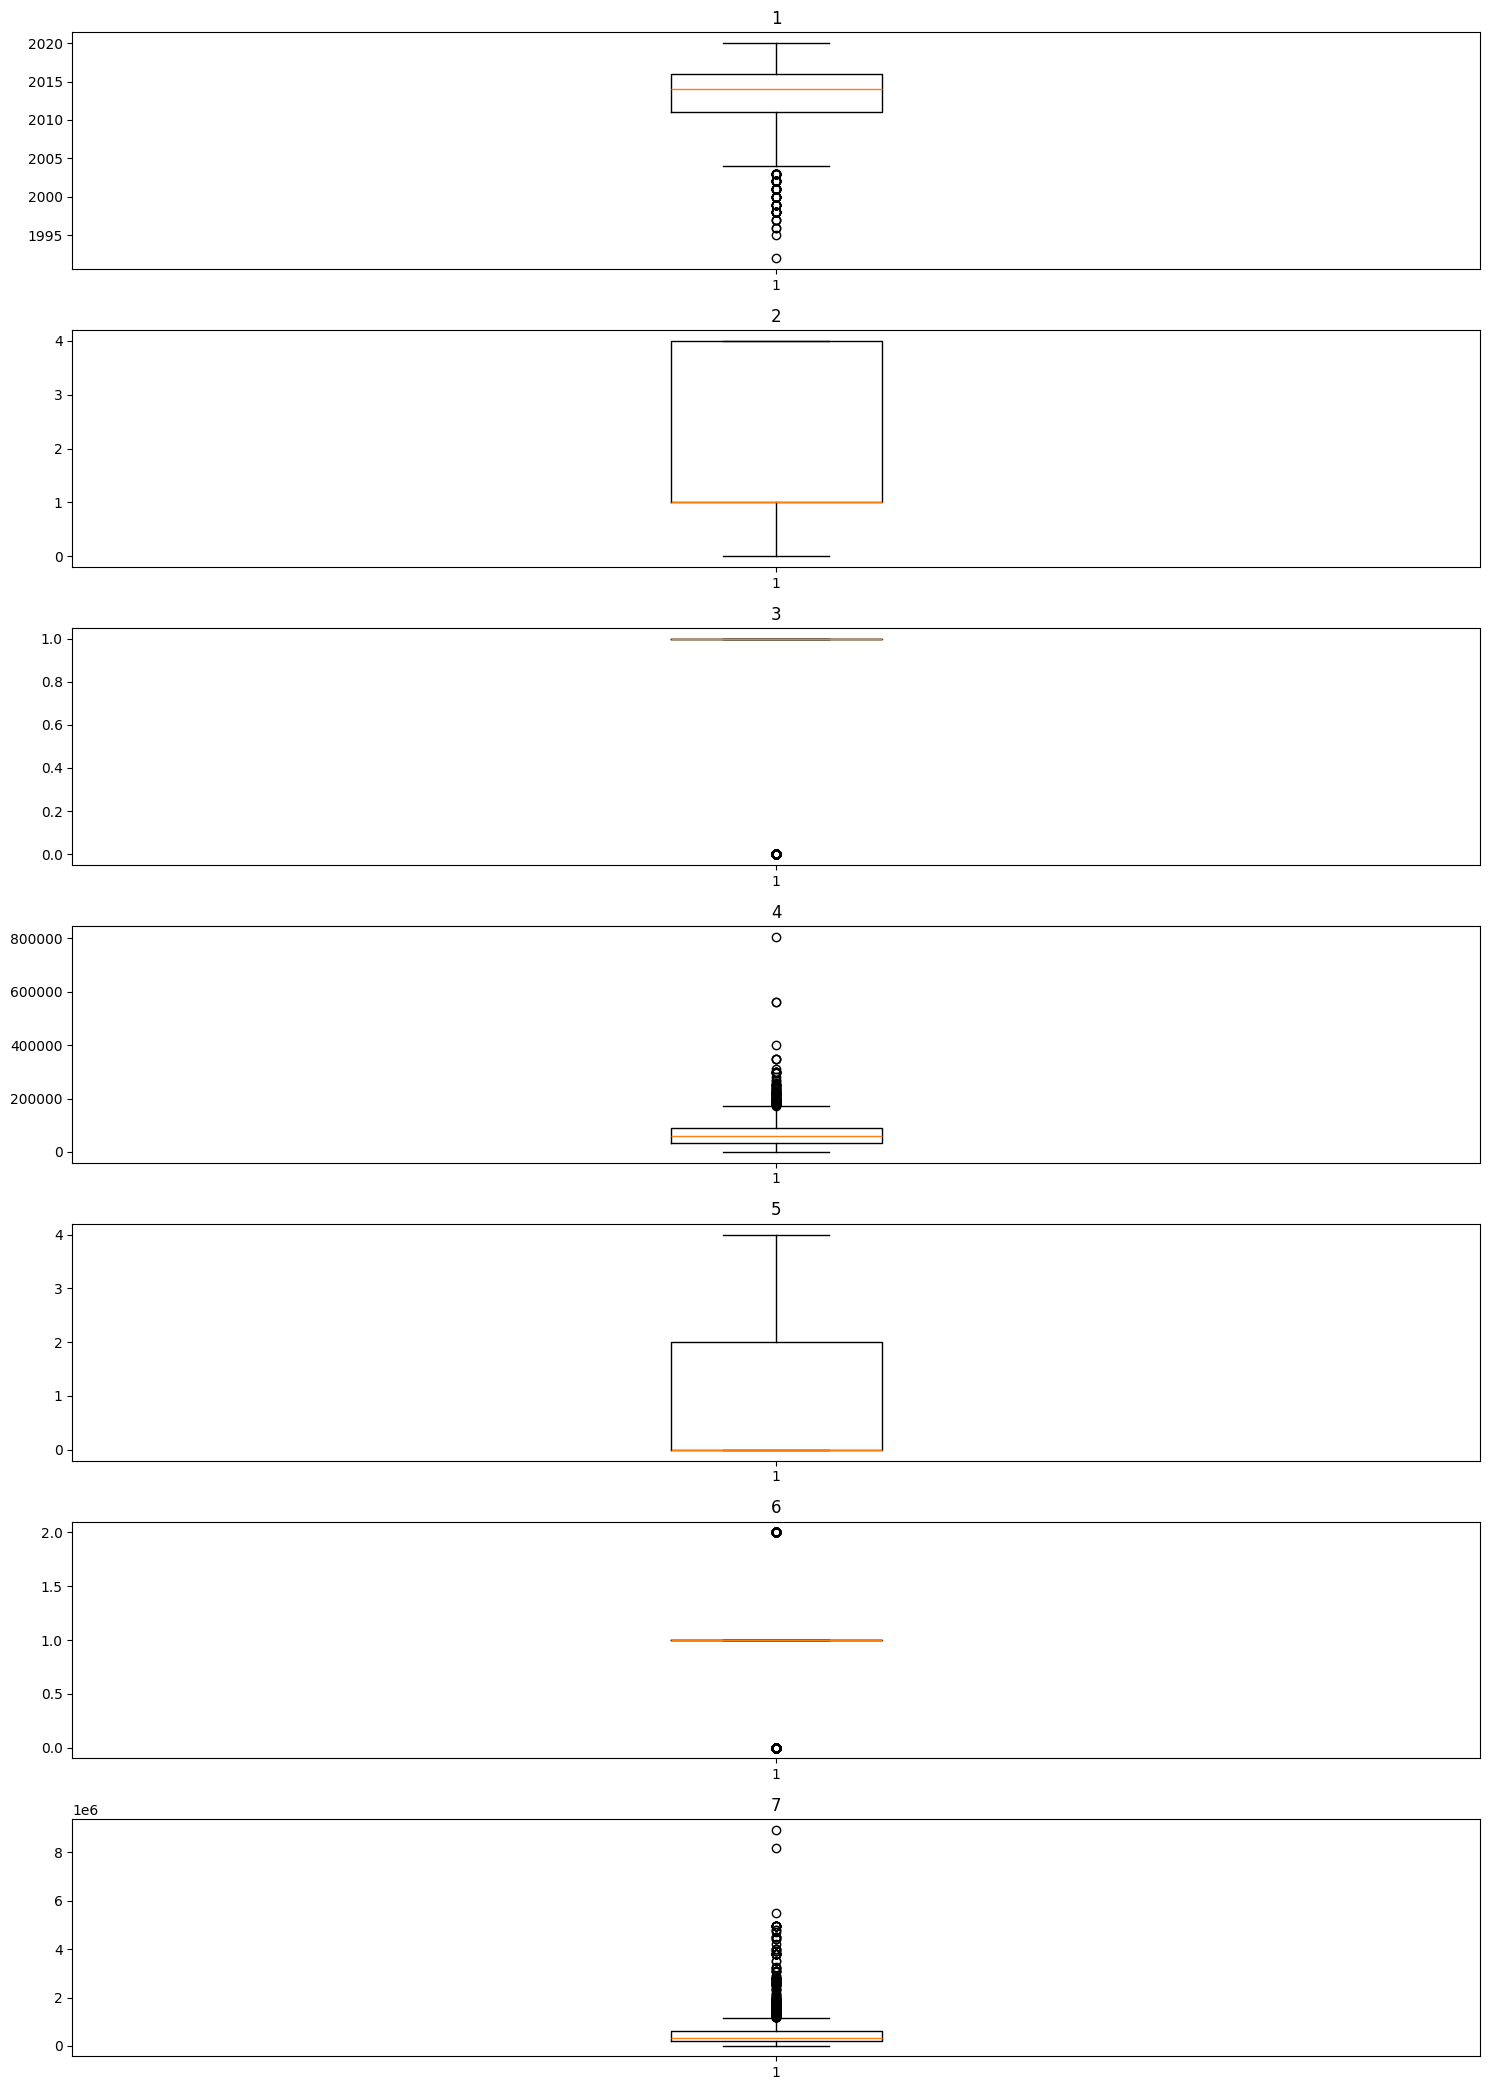

In [39]:
#Lets check there is any outlieres or not.

print("Lets check there is any outlieres or not.........\n")

plt.figure(figsize=(15,3*len(temp2)))

for i in range(1,len(temp2)+1):
    plt.subplot(len(temp2),1,i)
    plt.boxplot(x=temp2[i-1],data=df)
    plt.title(f"{i}")
plt.tight_layout()
plt.show()

In [ ]:
#Lets Devide this into the Saperate columns for the train test split data

x = df.iloc[::-1]


In [ ]:
#Lets Remove the long name of the car and make its small and delete other things and then 

In [ ]:
# #Lets Encode the Other Requered Fields using of the  Technique.

# temp = ['fuel','seller_type','owner']

# ord = OrdinalEncoder()

# order_data_fuel= ['Petrol','Diesel','CNG','LPG','Electric']
# order_data_seller_type= ['Individual' , 'Dealer' , 'Trustmark Dealer']
# order_data_owner= ['First Owner','Second Owner','Fourth & Above Owner','Third Owner','Test Drive Car']

